In [ ]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import math

In [ ]:
W = 3
N = 200
phi = 0.25

In [ ]:
def H(x):
  y = (x+1) % 1
  # print(y)
  return -y * (y-0.25) * (y-1)
  # return -x * (x-0.25) * (x-1)

In [ ]:
class Individual:
  def __init__(self,parent = False, parent1 = None,clone = False) -> None:
      if parent:
        self.alpha = np.copy(parent1.alpha)
        self.gamma = np.copy(parent1.gamma)
        # if clone:
        #   print("clone")

        if clone != True:
          # print("not clone")
          # if random.random() < 0.9:
          rand = np.random.randint(0,2,(4))
          # print(rand)
          self.alpha[rand[0],rand[1]] = np.random.uniform(-1,1)
          self.gamma[rand[2],rand[3]] = np.random.uniform(-1,1)

        
      else:    
        self.gamma = np.random.uniform(-1,1,(2,2))
        self.alpha = np.random.uniform(-1,1,(2,2))
      

  def stabilities(self):
      g = lambda x: (self.alpha[0,0]*H(x) + self.alpha[0,1]*H((x+0.5)%1) + self.alpha[1,0]*H(x)+ self.alpha[1,1]* H((x+0.5) %1)) -(self.gamma[0,0]*H(-x)+ self.gamma[0,1]*H((-x+0.5)%1) + self.gamma[1,0]* H((-x+0.5)%1) + self.gamma[1,1]*H(-x))
      j = optimize.fsolve(g,[0,1,0.5])
      
      # u = np.linspace(0,1)
      # plt.plot(u, g(u))
      # plt.grid(b=True)
      # plt.xlabel("Φ")
      # plt.ylabel("dΦ/dt")

      plt.show()

      for i in j:
        if (g(i+0.01)- g(i-0.01)) < 0 and i>0 and i<1:
          return i
      return None
            # self.t1 = (DT * (w+ self.alpha[0,0] * H(phi) + self.alpha[0,1] * H((phi+ 0.5)% 1) + self.alpha[1,0] * H(phi)))
  

In [ ]:
main = []
normeds = []

In [ ]:
phin = []
inds=[]
for jeirdkfhsdfj in range(N):
 
  inds.append(Individual())

for ui in tqdm(range(20)):

  steps = []
  for uti in inds:
    steps.append(uti.stabilities())
  # print(np.array(steps))
  normed = np.absolute(np.array(steps,dtype=float) - phi)
  # print(steps)
  # print(steps)
  # print(np.sort(normed))
  phin.append(np.sort(normed)[0])

  #   normed = np.absolute(np.array(steps,dtype=float) - phi)

  sorted10 = np.argsort(normed)[0:10]
  # print(normed[sorted10])
  # print(np.sort(normed))
  # print(sorted10)
  tmp = inds.copy()
  inds.clear()
  for uoi in sorted10:
  #   # print(ui + 2)
    # print(tmp[uoi])
    for usdhf in range(19):
      # print(tmp[uoi])
      inds.append(Individual(parent=True, parent1=tmp[uoi]))
    inds.append(Individual(parent=True, parent1 = tmp[uoi],clone=True))
  
  # inds.append(Individual(parent= True, parent1 = tmp[top1]))
  
# np.where(normed == np.sort(normed)[1])
# np.where(normed == np.sort(normed)[])
main.append(inds)
normeds.append(normed)

  0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
100%|██████████| 20/20 [00:08<00:00,  2.27it/s]


In [ ]:
len(main)

4

Text(0, 0.5, 'Φ (phi)')

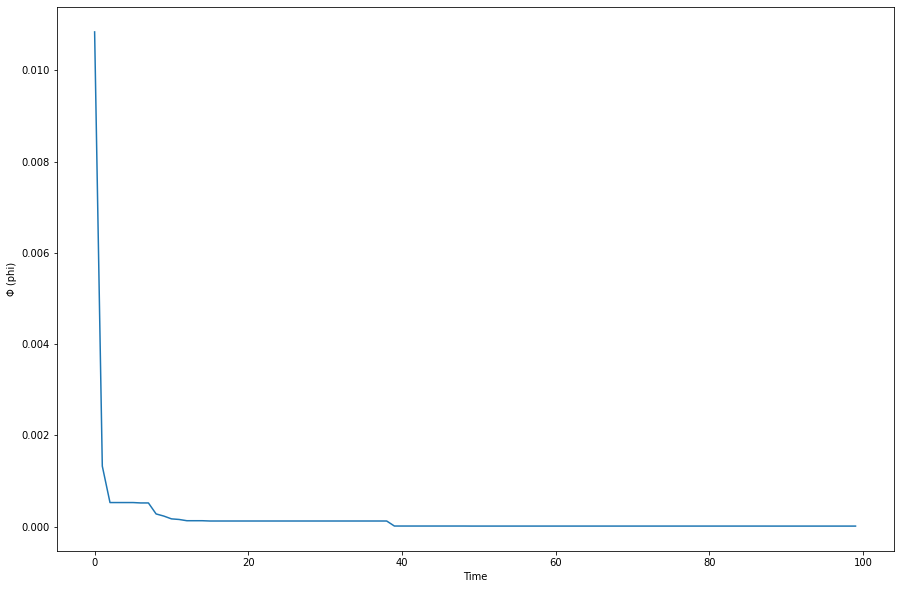

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(np.array(phin))
plt.xlabel("Time")
plt.ylabel("Φ (phi)")

In [ ]:
out = []
out.append(np.argsort(normed)[0])
for i in range(3):
  out.append(random.choice(np.argsort(normed)[1:50]))

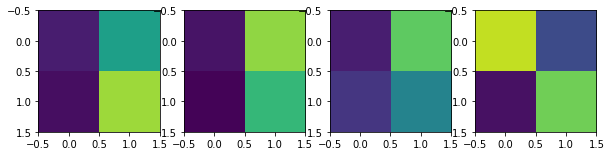

In [ ]:
plt.figure(figsize=(10,6))
itercounter = 1
for j,o in zip(main,normeds):
  # print("o")
  plt.subplot(1,4,itercounter)
  plt.imshow(j[np.argsort(o)[0]].alpha,vmin = -1,vmax= 1)
  itercounter +=1
# plt.suptitle("Gamma")
plt.show()

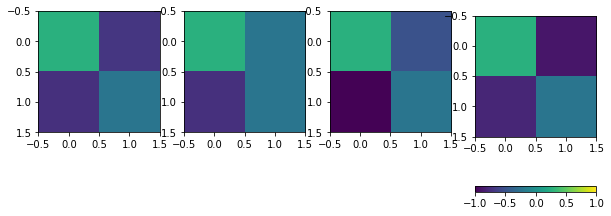

In [ ]:
plt.figure(figsize=(10,6))
for sti,stv in enumerate(out):
  plt.subplot(1,4,sti+1)
  plt.imshow(inds[stv].gamma,vmin=-1,vmax=1)
# plt.show()
plt.colorbar(orientation='horizontal')
plt.show()

In [ ]:
H(np.array([.3,.3,-.3,.3]))

[0.3 0.3 0.7 0.3]


array([0.0105, 0.0105, 0.0945, 0.0105])